In [1]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense,SimpleRNN,Embedding,Flatten

In [2]:
import numpy as np
import pandas as pd

In [3]:
train_ds = pd.read_csv('train.csv',encoding='latin1')
validation_ds = pd.read_csv('test.csv',encoding='latin1')

train_ds = train_ds[['text','sentiment']]
validation_ds = validation_ds[['text','sentiment']]

In [4]:
train_ds['text'].fillna('',inplace=True)
validation_ds['text'].fillna('',inplace=True)
print(train_ds.shape, validation_ds.shape)

(27481, 2) (4815, 2)


/var/folders/hn/3k_p0wd56px5jddmk5phxv800000gn/T/ipykernel_33055/2018693194.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_ds['text'].fillna('',inplace=True)
/var/folders/hn/3k_p0wd56px5jddmk5phxv800000gn/T/ipykernel_33055/2018693194.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

In [5]:
train_ds = train_ds[train_ds.sentiment != "neutral"]
validation_ds = validation_ds[validation_ds.sentiment != "neutral"]
train_ds = train_ds.dropna(subset=['sentiment'])
validation_ds = validation_ds.dropna(subset=['sentiment'])

def func(sentiment):
    if sentiment =='positive':
        return 0
    else: return 1
train_ds['sentiment'] = train_ds['sentiment'].apply(func)
validation_ds['sentiment'] = validation_ds['sentiment'].apply(func)
print(train_ds.shape, validation_ds.shape)

(16363, 2) (2104, 2)


In [6]:
x_train = np.array(train_ds['text'].tolist())
y_train = np.array(train_ds['sentiment'].tolist())
x_test = np.array(validation_ds['text'].tolist())
y_test = np.array(validation_ds['sentiment'].tolist())
print(len(x_train), len(y_train), len(x_test), len(y_test))

16363 16363 2104 2104


In [7]:
x_train

array([' Sooo SAD I will miss you here in San Diego!!!',
       'my boss is bullying me...', ' what interview! leave me alone',
       ...,
       ' I`ve wondered about rake to.  The client has made it clear .NET only, don`t force devs to learn a new lang  #agile #ccnet',
       ' Yay good for both of you. Enjoy the break - you probably need it after such hectic weekend  Take care hun xxxx',
       ' But it was worth it  ****.'], dtype='<U147')

In [8]:
y_train

array([1, 1, 1, ..., 1, 0, 0])

In [9]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
y_train.shape

(16363, 2)

In [11]:
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(x_train)
tokenizer.fit_on_texts(x_test)

In [12]:
len(tokenizer.word_index)

20316

In [13]:
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

In [14]:
from tensorflow.keras.utils import pad_sequences
x_train = pad_sequences(x_train, padding='post', maxlen=35)  # Set maxlen to 35
x_test = pad_sequences(x_test, padding='post', maxlen=35) 

In [15]:
x_train[0]

array([ 358,   88,    1,   68,   73,    7,   97,   12, 1374, 2169,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0], dtype=int32)

In [16]:
x_train.shape

(16363, 35)

In [17]:
model = Sequential()
model.add(Embedding(input_dim=20000, output_dim=5, input_length=35))
model.add(SimpleRNN(32,return_sequences=False))
model.add(Dense(2,activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [18]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
512/512 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6060 - loss: 0.6386 - val_accuracy: 0.7576 - val_loss: 0.4750
Epoch 2/10
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8639 - loss: 0.3383 - val_accuracy: 0.8674 - val_loss: 0.3415
Epoch 3/10
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9252 - loss: 0.2101 - val_accuracy: 0.8517 - val_loss: 0.4117
Epoch 4/10
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9506 - loss: 0.1486 - val_accuracy: 0.8522 - val_loss: 0.4903
Epoch 5/10
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9652 - loss: 0.1074 - val_accuracy: 0.8636 - val_loss: 0.3881
Epoch 6/10
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9759 - loss: 0.0788 - val_accuracy: 0.8693 - val_loss: 0.3866
Epoch 7/10
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9807 - loss: 0.0629 - val_accuracy: 0.8636 - val_loss: 0.4782
Epoch 8/10
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9829 - loss: 0.0523 - val_accuracy: 0.

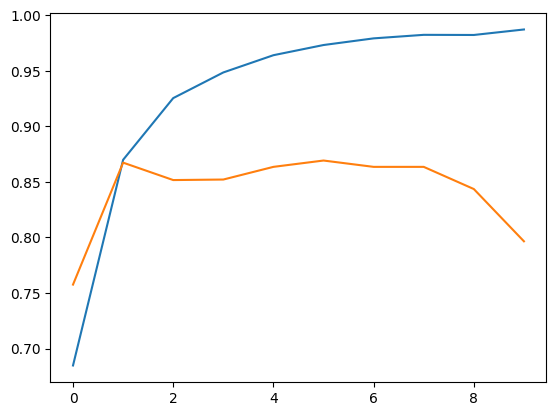

In [19]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [20]:
# Prediction 1
text = "The movie was bad bad bad, i will not recommend this movie to anyone"

new_text_seq = tokenizer.texts_to_sequences([text])
new_text_padded = pad_sequences(new_text_seq, padding='post', maxlen=35)  # Use the max_len determined during training
predictions = model.predict(new_text_padded)
predicted_class_index = predictions.argmax(axis=-1)
if predicted_class_index[0] == 0:
    print("Postive Sentiment")
else:
    print("Negative Sentiment")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Negative Sentiment


In [21]:
# Prediction 2
text = "The movie was good, i will recommend this movie to anyone"

new_text_seq = tokenizer.texts_to_sequences([text])
new_text_padded = pad_sequences(new_text_seq, padding='post', maxlen=35)  # Use the max_len determined during training
predictions = model.predict(new_text_padded)
predicted_class_index = predictions.argmax(axis=-1)
if predicted_class_index[0] == 0:
    print("Postive Sentiment")
else:
    print("Negative Sentiment")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Postive Sentiment
